<a href="https://colab.research.google.com/github/sneh6677/Cardio_vascular_disease_prediction/blob/main/CVD_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import cvxopt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from collections import Counter



Data Set cleaning and Preprocessing

In [ ]:
cols = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
df = pd.read_csv("processed.cleveland.data",  names=cols)
df['target'] = df['target'].replace({2: 1, 3: 1, 4: 1})
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Empty and unwanted data cleaning


In [ ]:

df = df.replace('?', np.nan)
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.fillna(df.mean())

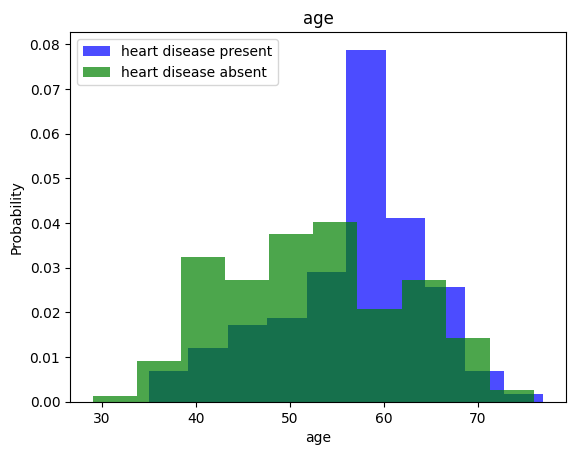

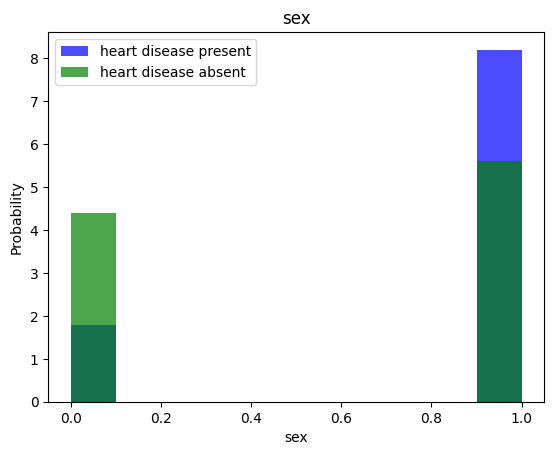

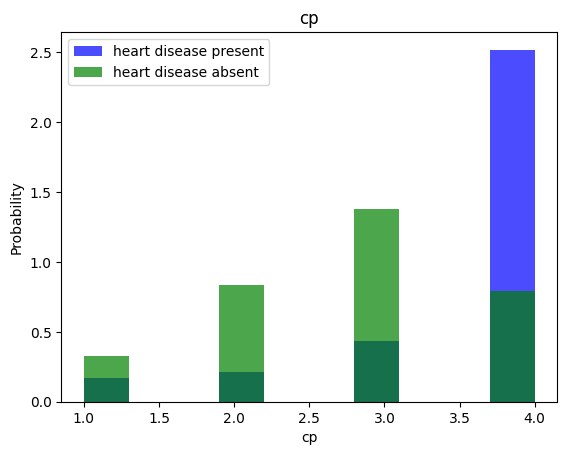

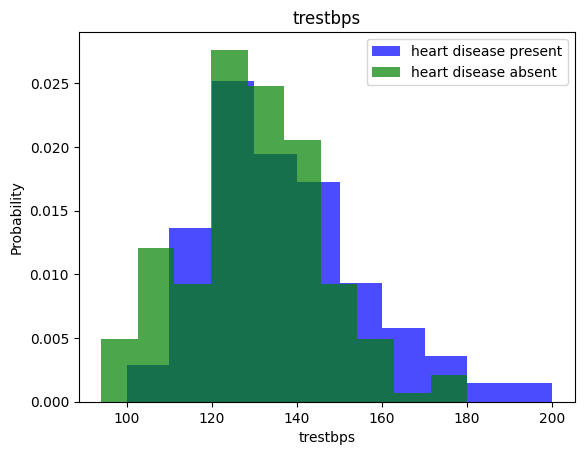

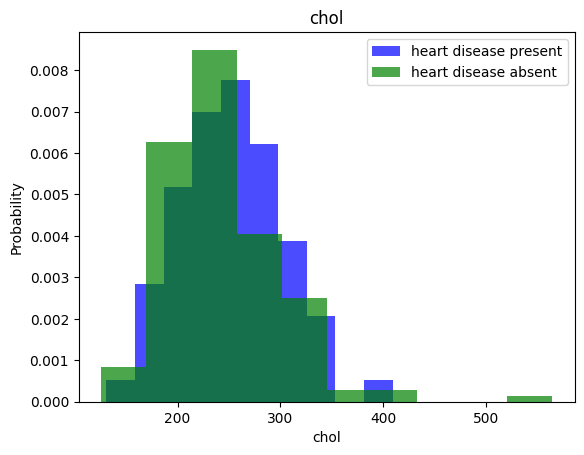

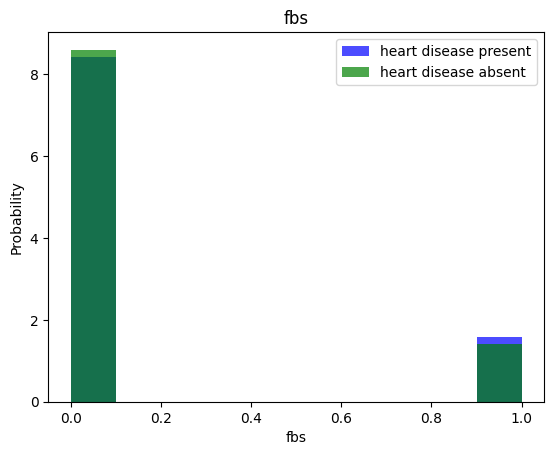

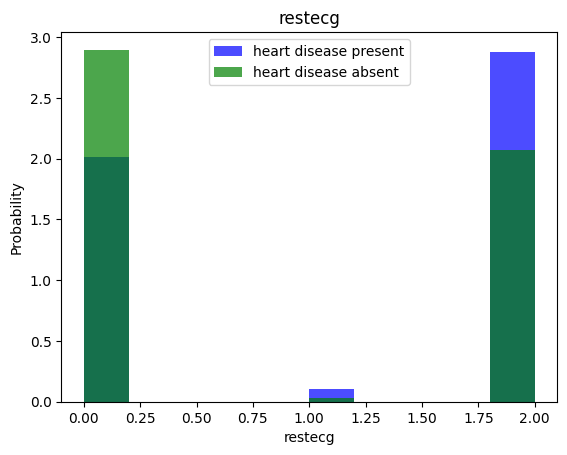

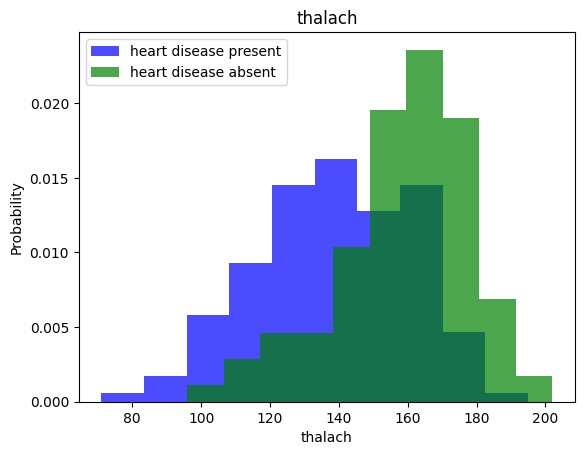

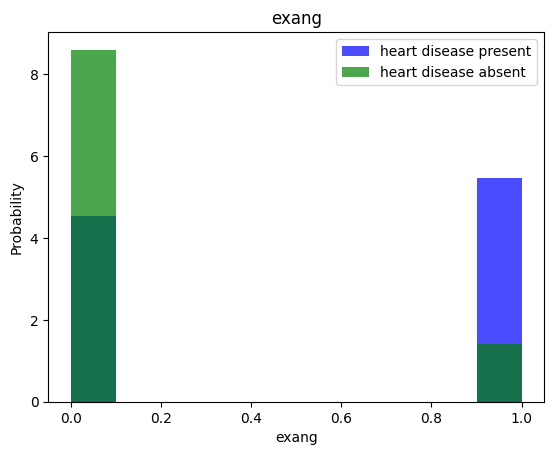

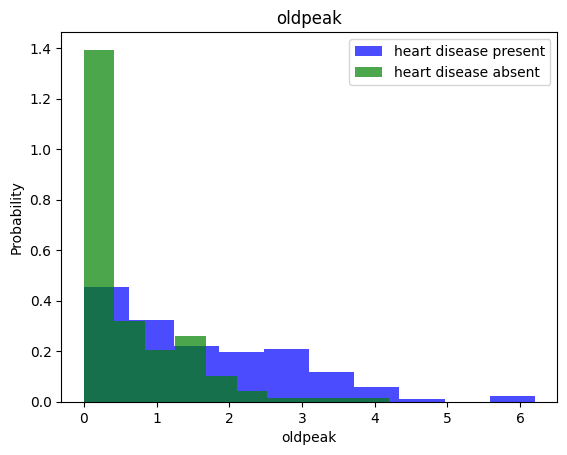

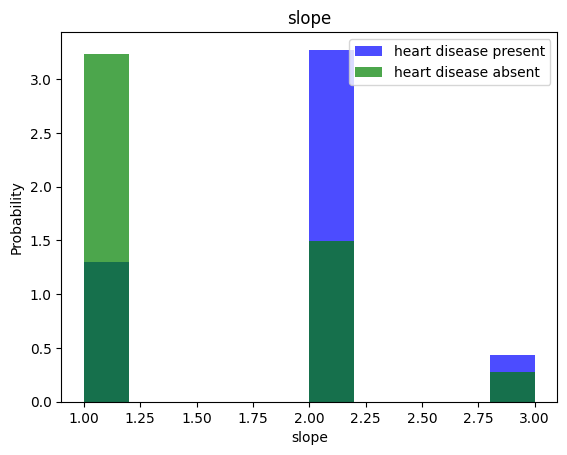

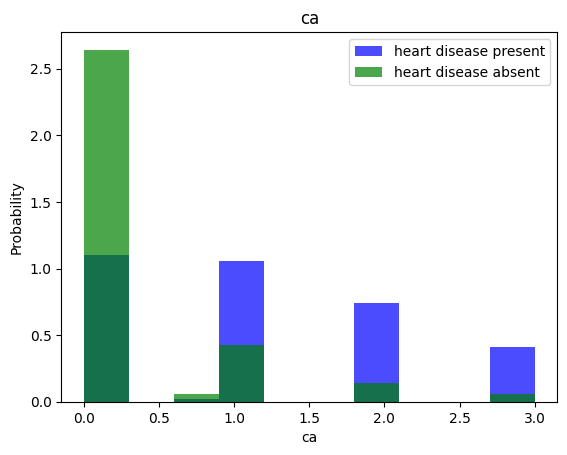

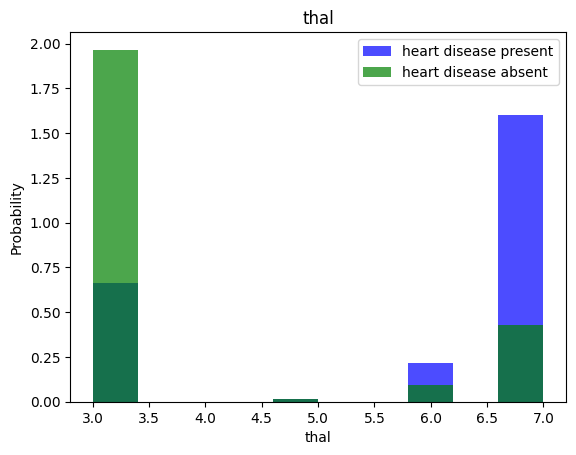

In [ ]:
for label in cols[:-1]:
   mp.hist(df[df['target'] == 1][label], color='blue', label='heart disease present', alpha=0.7, density=True)
   mp.hist(df[df['target'] == 0][label], color='green', label='heart disease absent', alpha=0.7, density=True)
   mp.title(label)
   mp.ylabel('Probability')
   mp.xlabel(label)
   mp.legend()
   mp.show()

Splitting the data set for training and testing (70:30)

In [ ]:
train, test = np.split(df.sample(frac=1, random_state=42), [int(0.70*len(df))])

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Data before oversampling

In [ ]:
print(len(train [train['target'] == 1]))
print(len(train [train['target'] == 0]))

95
117


Scaling and oversampling


In [ ]:
def scale_data(df, oversample = False):
  x = df[df.columns[:-1]].values
  y = df[df.columns[-1]].values

  scaler = StandardScaler()
  x = scaler.fit_transform(x)
  RANDOM_STATE = 42;
  if oversample:
    ros = RandomOverSampler(random_state=RANDOM_STATE)
    x, y = ros.fit_resample(x, y)
  data = np.hstack((x, np.reshape(y, (-1, 1)))) #creating a 2D  numpy array

  return data, x, y


In [ ]:
train_s, x_train, y_train = scale_data(train, oversample=True)
test_s, x_test, y_test = scale_data(test, oversample=False)


In [ ]:
sum(y_train==1)


np.int64(117)

In [ ]:
sum(y_train==0)

np.int64(117)

In [ ]:
import math
math.sqrt(len(y_test))

9.539392014169456

K-Nearest N


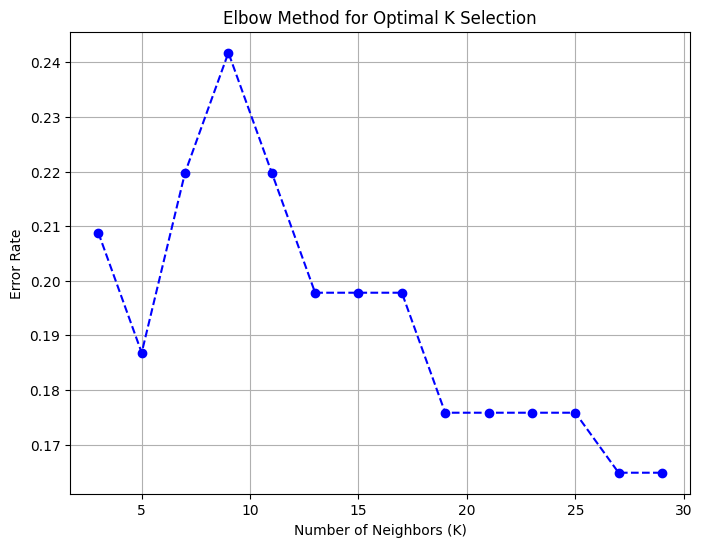

In [ ]:
k_values = list(range(3, 31, 2))  #  only odd K values between 3 and 30
error_rates = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)

    error = 1 - accuracy_score(y_test, y_pred)
    error_rates.append(error)

plt.figure(figsize=(8,6))
plt.plot(k_values, error_rates, marker='o', linestyle='dashed', color='b')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Error Rate")
plt.title("Elbow Method for Optimal K Selection")
plt.grid()
plt.show()

In [ ]:
kn_model = KNeighborsClassifier(n_neighbors=19, p =2, metric='euclidean')
kn_model.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=19)

In [ ]:
y_pred = kn_model.predict(x_test)

In [ ]:
y_pred

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0])

In [ ]:
y_test

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0])

In [ ]:
knn_conf_matrix = confusion_matrix(y_test, y_pred)
knn_acc_score = accuracy_score(y_test, y_pred)
print("confusion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test, y_pred))

confusion matrix
[[41  6]
 [10 34]]


Accuracy of K-NeighborsClassifier: 82.41758241758241 

              precision    recall  f1-score   support

           0       0.80      0.87      0.84        47
           1       0.85      0.77      0.81        44

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



In [ ]:

y_train_pred = knn.predict(x_train)
y_test_pred = knn.predict(x_test)


# TRAINING RESULTS

train_conf_matrix = confusion_matrix(y_train, y_train_pred)
train_acc_score = accuracy_score(y_train, y_train_pred)

print("TRAINING PERFORMANCE")
print("Confusion Matrix:")
print(train_conf_matrix)
print("Accuracy of K-NeighborsClassifier on Training Data:", train_acc_score * 100, '\n')
print("Classification Report:")
print(classification_report(y_train, y_train_pred))

# TESTING RESULTS

test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_acc_score = accuracy_score(y_test, y_test_pred)

print("\n TESTING PERFORMANCE")
print("Confusion Matrix:")
print(test_conf_matrix)
print("Accuracy of K-NeighborsClassifier on Test Data:", test_acc_score * 100, '\n')
print("Classification Report:")
print(classification_report(y_test, y_test_pred))


TRAINING PERFORMANCE
Confusion Matrix:
[[101  16]
 [ 21  96]]
Accuracy of K-NeighborsClassifier on Training Data: 84.1880341880342 

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       117
           1       0.86      0.82      0.84       117

    accuracy                           0.84       234
   macro avg       0.84      0.84      0.84       234
weighted avg       0.84      0.84      0.84       234


 TESTING PERFORMANCE
Confusion Matrix:
[[43  4]
 [11 33]]
Accuracy of K-NeighborsClassifier on Test Data: 83.51648351648352 

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        47
           1       0.89      0.75      0.81        44

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



Logistic Regression


In [ ]:
lg_model = LogisticRegression(random_state=0)
lg_model = lg_model.fit(x_train, y_train)
lg_pred = lg_model.predict(x_test)
lg_conf_matrix = confusion_matrix(y_test, lg_pred)
lg_acc_score = accuracy_score(y_test, lg_pred)
print("confussion matrix")
print(lg_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lg_acc_score*100,'\n')
print(classification_report(y_test,lg_pred))

confussion matrix
[[41  6]
 [ 9 35]]


Accuracy of Logistic Regression: 83.51648351648352 

              precision    recall  f1-score   support

           0       0.82      0.87      0.85        47
           1       0.85      0.80      0.82        44

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



In [ ]:


lg_train_pred = lg_model.predict(x_train)
lg_test_pred = lg_model.predict(x_test)

# TRAINING RESULTS
lg_train_conf_matrix = confusion_matrix(y_train, lg_train_pred)
lg_train_acc_score = accuracy_score(y_train, lg_train_pred)

print("TRAINING PERFORMANCE (Logistic Regression)")
print("Confusion Matrix:")
print(lg_train_conf_matrix)
print("Accuracy on Training Data:", lg_train_acc_score * 100, '\n')
print("Classification Report:")
print(classification_report(y_train, lg_train_pred))

# TESTING RESULTS
lg_test_conf_matrix = confusion_matrix(y_test, lg_test_pred)
lg_test_acc_score = accuracy_score(y_test, lg_test_pred)

print("\nTESTING PERFORMANCE (Logistic Regression)")
print("Confusion Matrix:")
print(lg_test_conf_matrix)
print("Accuracy on Test Data:", lg_test_acc_score * 100, '\n')
print("Classification Report:")
print(classification_report(y_test, lg_test_pred))


TRAINING PERFORMANCE (Logistic Regression)
Confusion Matrix:
[[103  14]
 [ 21  96]]
Accuracy on Training Data: 85.04273504273505 

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       117
           1       0.87      0.82      0.85       117

    accuracy                           0.85       234
   macro avg       0.85      0.85      0.85       234
weighted avg       0.85      0.85      0.85       234


TESTING PERFORMANCE (Logistic Regression)
Confusion Matrix:
[[41  6]
 [ 9 35]]
Accuracy on Test Data: 83.51648351648352 

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.85        47
           1       0.85      0.80      0.82        44

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



SVM


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': [0.01, 0.1, 0.5, 1, 5, 10],  # Range of gamma values
    'kernel': ['rbf']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

best_gamma = grid_search.best_params_['gamma']
best_C = grid_search.best_params_['C']
best_score = grid_search.best_score_

print(f"Best Gamma: {best_gamma}")
print(f"Best C: {best_C}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

svm_model = SVC(kernel='rbf', C=best_C, gamma=0.08)
svm_model.fit(x_train, y_train)

y_pred = svm_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy with Best Gamma and C: {test_accuracy:.4f}")


Best Gamma: 0.1
Best C: 1
Best Cross-Validation Accuracy: 0.8548
Test Accuracy with Best Gamma and C: 0.8022


In [ ]:
def calculate_variance(data):

    if isinstance(data, pd.DataFrame):
        return data.var(ddof=0)
    elif isinstance(data, np.ndarray):
        return np.var(data, axis=0)
    else:
        raise ValueError("Input should be a NumPy array or Pandas DataFrame.")
feature_variance = calculate_variance(x_train)

# Compute default gamma value
n_features = x_train.shape[1]
gamma_default = 1 / (n_features * feature_variance.mean())

print(f"Calculated Default Gamma: {gamma_default:.6f}")

# Grid Search for Best Parameters
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 0.5, 1, 5, 10, gamma_default],
    'kernel': ['rbf']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Get the best gamma and C values
best_gamma = grid_search.best_params_['gamma']
best_C = grid_search.best_params_['C']
best_score = grid_search.best_score_

print(f"Best Gamma: {best_gamma}")
print(f"Best C: {best_C}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

svm_model = SVC(kernel='rbf', C=best_C, gamma=best_gamma)
svm_model.fit(x_train, y_train)

y_pred = svm_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy with Best Gamma and C: {test_accuracy:.4f}")

Calculated Default Gamma: 0.076461
Best Gamma: 0.1
Best C: 1
Best Cross-Validation Accuracy: 0.8548
Test Accuracy with Best Gamma and C: 0.8022


In [ ]:
y_pred = svm_model.predict(x_test)
svm_conf_matrix = confusion_matrix(y_test, y_pred)
svm_acc_score = accuracy_score(y_test, y_pred)
print("confusion matrix")
print(svm_conf_matrix)
print("\n")
print("Accuracy of SVM:",svm_acc_score*100,'\n')
print(classification_report(y_test,y_pred))

confusion matrix
[[40  7]
 [11 33]]


Accuracy of SVM: 80.21978021978022 

              precision    recall  f1-score   support

           0       0.78      0.85      0.82        47
           1       0.82      0.75      0.79        44

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



In [ ]:
svm_train_pred = svm_model.predict(x_train)

svm_test_pred = svm_model.predict(x_test)

svm_train_conf_matrix = confusion_matrix(y_train, svm_train_pred)
svm_train_acc_score = accuracy_score(y_train, svm_train_pred)

print("TRAINING PERFORMANCE (SVM)")
print("Confusion Matrix:")
print(svm_train_conf_matrix)
print("Accuracy on Training Data:", svm_train_acc_score * 100, '\n')
print("Classification Report:")
print(classification_report(y_train, svm_train_pred))

svm_test_conf_matrix = confusion_matrix(y_test, svm_test_pred)
svm_test_acc_score = accuracy_score(y_test, svm_test_pred)

print("\nTESTING PERFORMANCE (SVM)")
print("Confusion Matrix:")
print(svm_test_conf_matrix)
print("Accuracy on Test Data:", svm_test_acc_score * 100, '\n')
print("Classification Report:")
print(classification_report(y_test, svm_test_pred))


TRAINING PERFORMANCE (SVM)
Confusion Matrix:
[[112   5]
 [  9 108]]
Accuracy on Training Data: 94.01709401709401 

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       117
           1       0.96      0.92      0.94       117

    accuracy                           0.94       234
   macro avg       0.94      0.94      0.94       234
weighted avg       0.94      0.94      0.94       234


TESTING PERFORMANCE (SVM)
Confusion Matrix:
[[40  7]
 [11 33]]
Accuracy on Test Data: 80.21978021978022 

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.85      0.82        47
           1       0.82      0.75      0.79        44

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



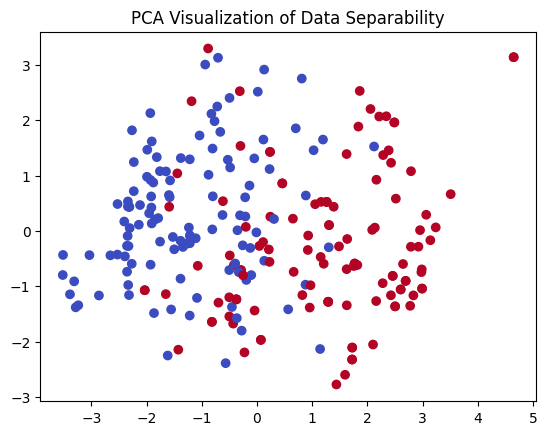

In [ ]:

pca = PCA(n_components=2)
X_pca = pca.fit_transform(x_train)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='coolwarm')
plt.title("PCA Visualization of Data Separability")
plt.show()


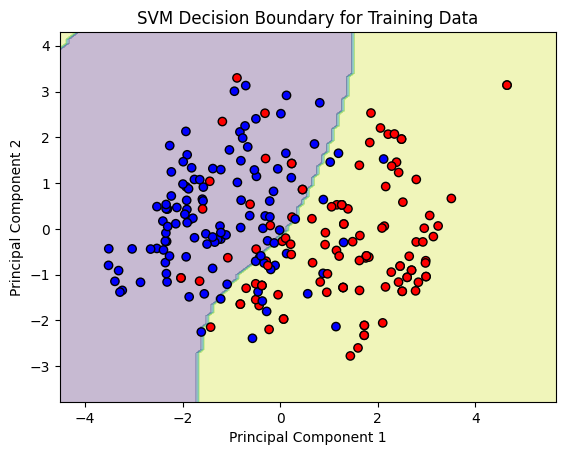

In [ ]:

pca = PCA(n_components=2)
x_train_2d = pca.fit_transform(x_train)

svm_model = SVC(kernel='rbf', C=1, gamma='scale')
svm_model.fit(x_train_2d, y_train)

# Create meshgrid to plot decision boundary
x_min, x_max = x_train_2d[:, 0].min() - 1, x_train_2d[:, 0].max() + 1
y_min, y_max = x_train_2d[:, 1].min() - 1, x_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(x_train_2d[:, 0], x_train_2d[:, 1], c=y_train, cmap=plt.cm.bwr, edgecolors='k')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("SVM Decision Boundary for Training Data")
plt.show()


In [ ]:


X = np.array([
    [0.63, -1.38, -0.24],
    [0.94, 0.92, 1.50],
    [0.94, 0.92, -0.38],
    [-1.42, 0.15, 0.32],
    [-1.10, -0.62, -1.20]
])

Y = np.array([1, -1, 1, -1, 1])


C = 10
gamma = 0.1

def rbf_kernel(X1, X2, gamma):
    return np.exp(-gamma * np.linalg.norm(X1 - X2) ** 2)

n_samples = X.shape[0]
K = np.zeros((n_samples, n_samples))

for i in range(n_samples):
    for j in range(n_samples):
        K[i, j] = rbf_kernel(X[i], X[j], gamma)

P = cvxopt.matrix(np.outer(Y, Y) * K)
q = cvxopt.matrix(-np.ones(n_samples))
G = cvxopt.matrix(np.vstack((-np.eye(n_samples), np.eye(n_samples))))
h = cvxopt.matrix(np.hstack((np.zeros(n_samples), np.ones(n_samples) * C)))
A = cvxopt.matrix(Y, (1, n_samples), 'd')
b = cvxopt.matrix(0.0)

solution = cvxopt.solvers.qp(P, q, G, h, A, b)

alphas = np.ravel(solution['x'])

print("Optimal Alpha values (only non-zero support vectors):")
for i in range(len(alphas)):
    if alphas[i] > 1e-5:
        print(f"α[{i}] = {alphas[i]:.4f}")
support_vector_idx = np.where(alphas > 1e-5)[0]
bias = np.mean([Y[i] - sum(alphas[j] * Y[j] * K[i, j] for j in support_vector_idx) for i in support_vector_idx])

print(f"Bias (b) = {bias:.4f}")


     pcost       dcost       gap    pres   dres
 0:  4.5751e-01 -1.2668e+02  1e+02  4e-16  2e-15
 1: -3.8530e+00 -1.6244e+01  1e+01  1e-16  8e-16
 2: -5.6288e+00 -6.6618e+00  1e+00  9e-17  3e-16
 3: -5.7227e+00 -5.7933e+00  7e-02  1e-16  3e-16
 4: -5.7285e+00 -5.7316e+00  3e-03  4e-16  5e-16
 5: -5.7285e+00 -5.7285e+00  3e-05  1e-16  4e-16
 6: -5.7285e+00 -5.7285e+00  3e-07  1e-16  3e-16
Optimal solution found.
Optimal Alpha values (only non-zero support vectors):
α[0] = 0.4628
α[1] = 2.2373
α[2] = 2.8719
α[3] = 3.4912
α[4] = 2.3938
Bias (b) = 0.0602


Decision Trees


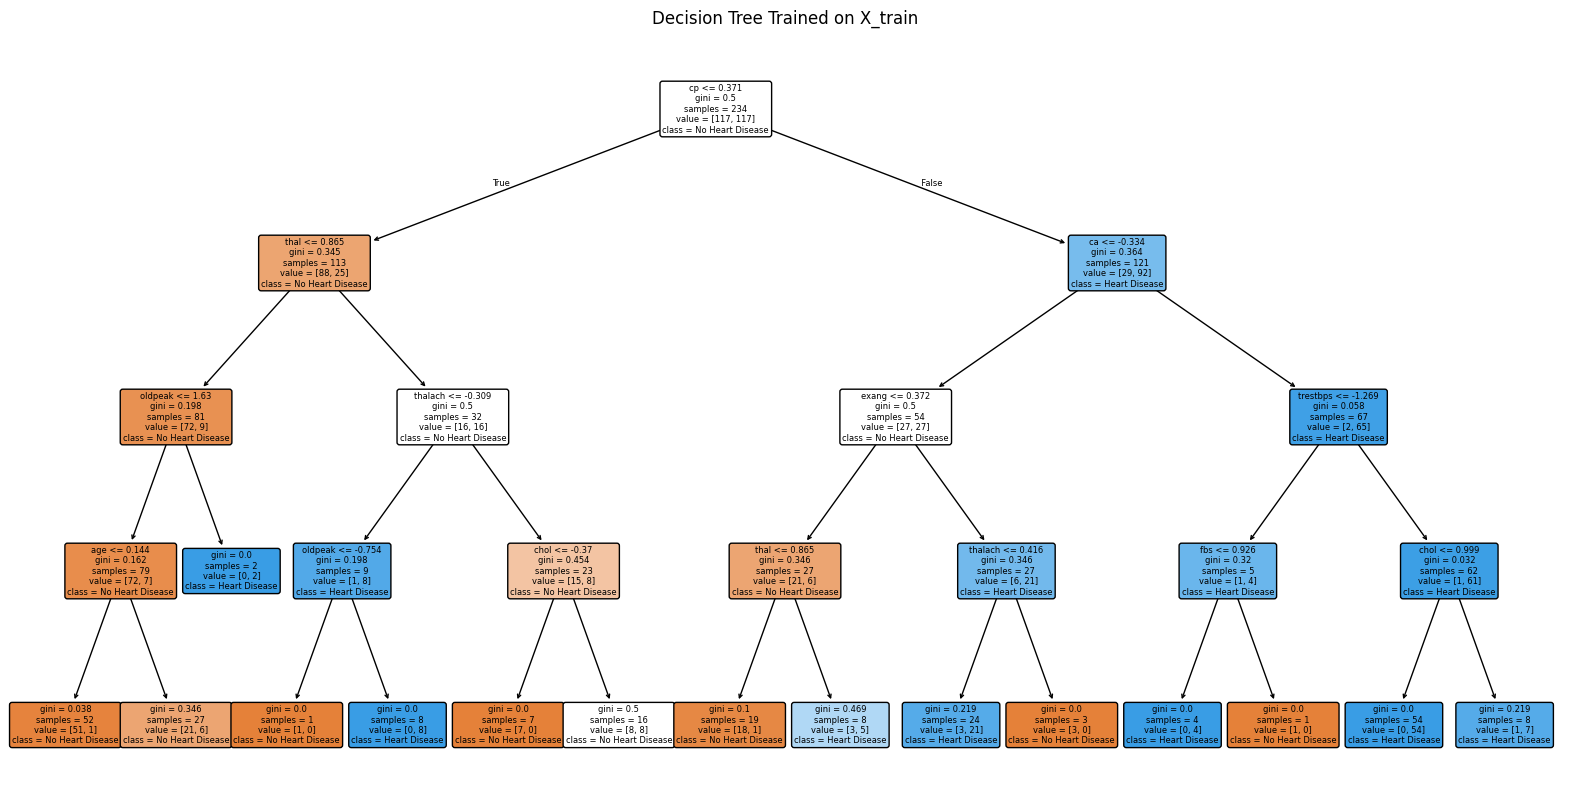

In [ ]:


clf = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
clf.fit(x_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(
    clf,
    feature_names=cols[:-1],
    class_names=["No Heart Disease", "Heart Disease"],
    filled=True,
    rounded=True
)
plt.title("Decision Tree Trained on X_train")
plt.show()



In [ ]:

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 42, max_depth=3, max_leaf_nodes=5)
clf_gini.fit(x_train, y_train)
y_pred = clf_gini.predict(x_test)
dsc_conf_matrix = confusion_matrix(y_test, y_pred)
dsc_acc_score = accuracy_score(y_test, y_pred)
print("confusion matrix")
print(dsc_conf_matrix)
print("\n")
print("Accuracy of Decision Tree:",dsc_acc_score*100,'\n')
print(classification_report(y_test,y_pred))

confusion matrix
[[41  6]
 [14 30]]


Accuracy of Decision Tree: 78.02197802197803 

              precision    recall  f1-score   support

           0       0.75      0.87      0.80        47
           1       0.83      0.68      0.75        44

    accuracy                           0.78        91
   macro avg       0.79      0.78      0.78        91
weighted avg       0.79      0.78      0.78        91



In [ ]:

clf_gini = DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=3, max_leaf_nodes=5)
clf_gini.fit(x_train, y_train)

dsc_train_pred = clf_gini.predict(x_train)
dsc_test_pred = clf_gini.predict(x_test)


# TRAINING RESULTS

dsc_train_conf_matrix = confusion_matrix(y_train, dsc_train_pred)
dsc_train_acc_score = accuracy_score(y_train, dsc_train_pred)

print("TRAINING PERFORMANCE (Decision Tree)")
print("Confusion Matrix:")
print(dsc_train_conf_matrix)
print("Accuracy on Training Data:", dsc_train_acc_score * 100, '\n')
print("Classification Report:")
print(classification_report(y_train, dsc_train_pred))


# TESTING RESULTS

dsc_test_conf_matrix = confusion_matrix(y_test, dsc_test_pred)
dsc_test_acc_score = accuracy_score(y_test, dsc_test_pred)

print("\nTESTING PERFORMANCE (Decision Tree)")
print("Confusion Matrix:")
print(dsc_test_conf_matrix)
print("Accuracy on Test Data:", dsc_test_acc_score * 100, '\n')
print("Classification Report:")
print(classification_report(y_test, dsc_test_pred))


TRAINING PERFORMANCE (Decision Tree)
Confusion Matrix:
[[109   8]
 [ 31  86]]
Accuracy on Training Data: 83.33333333333334 

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       117
           1       0.91      0.74      0.82       117

    accuracy                           0.83       234
   macro avg       0.85      0.83      0.83       234
weighted avg       0.85      0.83      0.83       234


TESTING PERFORMANCE (Decision Tree)
Confusion Matrix:
[[41  6]
 [14 30]]
Accuracy on Test Data: 78.02197802197803 

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.87      0.80        47
           1       0.83      0.68      0.75        44

    accuracy                           0.78        91
   macro avg       0.79      0.78      0.78        91
weighted avg       0.79      0.78      0.78        91



In [ ]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 0, max_depth=3, max_leaf_nodes=5)
clf_entropy.fit(x_train, y_train)
y_pred = clf_entropy.predict(x_test)
dsc_conf_matrix = confusion_matrix(y_test, y_pred)
dsc_acc_score = accuracy_score(y_test, y_pred)
print("confusion matrix")
print(dsc_conf_matrix)
print("\n")
print("Accuracy of Decision Tree:",dsc_acc_score*100,'\n')
print(classification_report(y_test,y_pred))

confusion matrix
[[41  6]
 [14 30]]


Accuracy of Decision Tree: 78.02197802197803 

              precision    recall  f1-score   support

           0       0.75      0.87      0.80        47
           1       0.83      0.68      0.75        44

    accuracy                           0.78        91
   macro avg       0.79      0.78      0.78        91
weighted avg       0.79      0.78      0.78        91



Random Forest

In [ ]:
randclass = RandomForestClassifier(n_estimators = 50, random_state=42, max_depth=15)
randclass.fit(x_train, y_train)
y_pred = randclass.predict(x_test)
rf_conf_matrix = confusion_matrix(y_test, y_pred)
rf_acc_score = accuracy_score(y_test, y_pred)
print("confusion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,y_pred))

confusion matrix
[[43  4]
 [11 33]]


Accuracy of Random Forest: 83.51648351648352 

              precision    recall  f1-score   support

           0       0.80      0.91      0.85        47
           1       0.89      0.75      0.81        44

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



In [ ]:


randclass = RandomForestClassifier(n_estimators=50, random_state=42, max_depth=15)
randclass.fit(x_train, y_train)


rf_train_pred = randclass.predict(x_train)
rf_test_pred = randclass.predict(x_test)

# TRAINING RESULTS
rf_train_conf_matrix = confusion_matrix(y_train, rf_train_pred)
rf_train_acc_score = accuracy_score(y_train, rf_train_pred)

print("TRAINING PERFORMANCE (Random Forest)")
print("Confusion Matrix:")
print(rf_train_conf_matrix)
print("Accuracy on Training Data:", rf_train_acc_score * 100, '\n')
print("Classification Report:")
print(classification_report(y_train, rf_train_pred))

# TESTING RESULTS
rf_test_conf_matrix = confusion_matrix(y_test, rf_test_pred)
rf_test_acc_score = accuracy_score(y_test, rf_test_pred)

print("\nTESTING PERFORMANCE (Random Forest)")
print("Confusion Matrix:")
print(rf_test_conf_matrix)
print("Accuracy on Test Data:", rf_test_acc_score * 100, '\n')
print("Classification Report:")
print(classification_report(y_test, rf_test_pred))


TRAINING PERFORMANCE (Random Forest)
Confusion Matrix:
[[117   0]
 [  0 117]]
Accuracy on Training Data: 100.0 

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       117
           1       1.00      1.00      1.00       117

    accuracy                           1.00       234
   macro avg       1.00      1.00      1.00       234
weighted avg       1.00      1.00      1.00       234


TESTING PERFORMANCE (Random Forest)
Confusion Matrix:
[[43  4]
 [11 33]]
Accuracy on Test Data: 83.51648351648352 

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        47
           1       0.89      0.75      0.81        44

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



In [ ]:


x_tr = df[train.columns[:-1]].values
y_tr = df[train.columns[-1]].values

x_tes = df[test.columns[:-1]].values
y_tes = df[test.columns[-1]].values



RF Raw data

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

randclass = RandomForestClassifier(n_estimators=50, max_depth=15, random_state=42)
randclass.fit(x_tr, y_tr)
y_pred = randclass.predict(x_tes)
rf_conf_matrix = confusion_matrix(y_tes, y_pred)
rf_acc_score = accuracy_score(y_tes, y_pred)
print("confusion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest :",rf_acc_score*100,'\n')
print(classification_report(y_tes,y_pred))

confusion matrix
[[164   0]
 [  0 139]]


Accuracy of Random Forest : 100.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       164
           1       1.00      1.00      1.00       139

    accuracy                           1.00       303
   macro avg       1.00      1.00      1.00       303
weighted avg       1.00      1.00      1.00       303



In [ ]:
# Sample Normalized Data
data = {
    'Age': [0.63, 0.94, 0.94, -1.42, -1.10],
    'CP': [-1.38, 0.92, 0.92, 0.15, -0.62],
    'Chol': [-0.24, 1.50, -0.38, 0.32, -1.20],
    'Target': [0, 1, 1, 0, 0]
}

df = pd.DataFrame(data)

X = df[['Age', 'CP', 'Chol']]
y = df['Target']

# New data point to predict
X_new = np.array([[-0.79, 0.15, -0.67]])

n_trees = 3
n_features_per_split = 2
predictions = []


for i in range(n_trees):
    # Bootstrap sample
    X_sample, y_sample = resample(X, y, replace=True, n_samples=len(X), random_state=i)

    # Random feature subset
    selected_features = np.random.choice(X.columns, n_features_per_split, replace=False)


    clf = DecisionTreeClassifier(random_state=i, max_depth=3)
    clf.fit(X_sample[selected_features], y_sample)


    pred = clf.predict(X_new[:, [X.columns.get_loc(f) for f in selected_features]])[0]
    predictions.append(pred)

    print(f"Tree {i+1} trained on features {list(selected_features)} → Prediction: {pred}")

# Final Prediction by Majority Voting
final_pred = Counter(predictions).most_common(1)[0][0]
print(f"\nFinal Prediction (Majority Vote): {final_pred} → {'Heart Disease' if final_pred == 1 else 'No Heart Disease'}")


Tree 1 trained on features ['CP', 'Chol'] → Prediction: 0
Tree 2 trained on features ['Chol', 'CP'] → Prediction: 0
Tree 3 trained on features ['Chol', 'CP'] → Prediction: 1

Final Prediction (Majority Vote): 0 → No Heart Disease


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


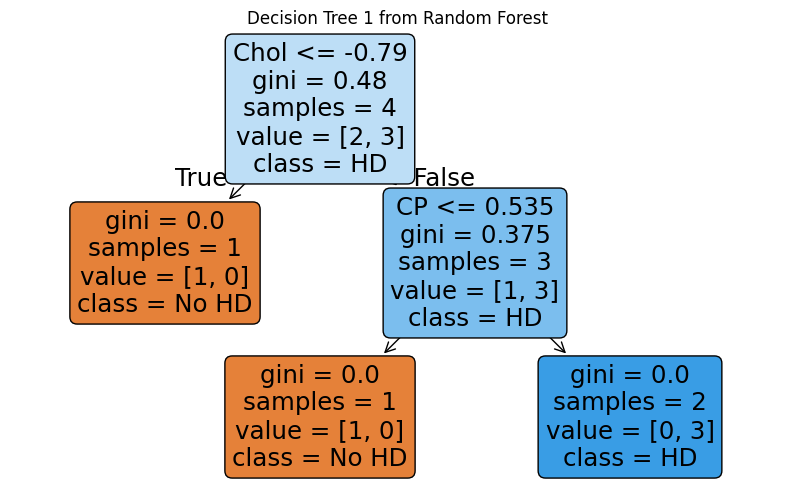

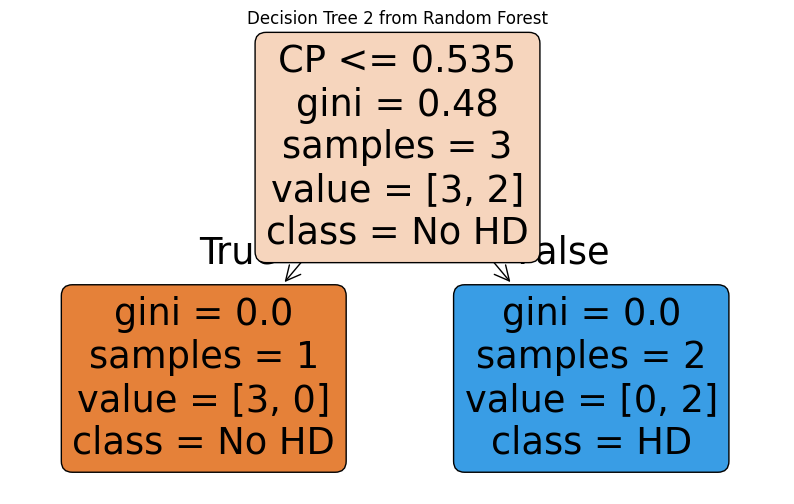

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

# Sample dataset (same as earlier)
data = {
    'Age': [0.63, 0.94, 0.94, -1.42, -1.10],
    'CP': [-1.38, 0.92, 0.92, 0.15, -0.62],
    'Chol': [-0.24, 1.50, -0.38, 0.32, -1.20],
    'Target': [0, 1, 1, 0, 0]
}

df = pd.DataFrame(data)
X = df[['CP', 'Chol']]
y = df['Target']

# Train Random Forest with 3 trees
rf = RandomForestClassifier(n_estimators=2, random_state=42)
rf.fit(X, y)

# Plot each tree in the forest
for idx, tree in enumerate(rf.estimators_):
    plt.figure(figsize=(10, 6))
    plot_tree(
        tree,
        feature_names=X.columns,
        class_names=['No HD', 'HD'],
        filled=True,
        rounded=True
    )
    plt.title(f"Decision Tree {idx+1} from Random Forest")
    plt.show()


80:37 split


In [ ]:
train_s, x_train, y_train = scale_data(train, oversample=True)
print(train_s.shape)



(234, 14)


In [ ]:



# Reconstruct DataFrame from train_s
balanced_df = pd.DataFrame(train_s, columns=[f'feature_{i}' for i in range(train_s.shape[1]-1)] + ['target'])

# Split each class into 80/37
class_0 = balanced_df[balanced_df['target'] == 0]
class_1 = balanced_df[balanced_df['target'] == 1]

train_0, test_0 = train_test_split(class_0, test_size=37, random_state=42)
train_1, test_1 = train_test_split(class_1, test_size=37, random_state=42)

train_set = pd.concat([train_0, train_1]).sample(frac=1, random_state=42)
test_set = pd.concat([test_0, test_1]).sample(frac=1, random_state=42)

# Extract features and target
x_train = train_set.drop(columns='target').values
y_train = train_set['target'].values
x_test = test_set.drop(columns='target').values
y_test = test_set['target'].values

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [ ]:

def evaluate_model(model, x_train, y_train, x_test, y_test, model_name="Model"):
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    print(f"\nTRAINING PERFORMANCE ({model_name})")
    print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
    print("Accuracy:", round(accuracy_score(y_train, y_train_pred) * 100, 2), "%")
    print("Classification Report:\n", classification_report(y_train, y_train_pred))

    print(f"\nTESTING PERFORMANCE ({model_name})")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
    print("Accuracy:", round(accuracy_score(y_test, y_test_pred) * 100, 2), "%")
    print("Classification Report:\n", classification_report(y_test, y_test_pred))
    print("="*60)

# models
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Support Vector Machine": SVC(kernel='rbf', probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(criterion="gini", max_depth=3, max_leaf_nodes=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=15, random_state=42)
}

# Evaluating all models
for name, model in models.items():
    evaluate_model(model, x_train, y_train, x_test, y_test, model_name=name)



TRAINING PERFORMANCE (K-Nearest Neighbors)
Confusion Matrix:
 [[102  15]
 [ 14 103]]
Accuracy: 87.61 %
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.88       117
           1       0.87      0.88      0.88       117

    accuracy                           0.88       234
   macro avg       0.88      0.88      0.88       234
weighted avg       0.88      0.88      0.88       234


TESTING PERFORMANCE (K-Nearest Neighbors)
Confusion Matrix:
 [[41  6]
 [11 33]]
Accuracy: 81.32 %
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.87      0.83        47
           1       0.85      0.75      0.80        44

    accuracy                           0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91


TRAINING PERFORMANCE (Logistic Regression)
Confusion Matrix:
 [[103  14]
 [ 21  96]]
Accuracy:

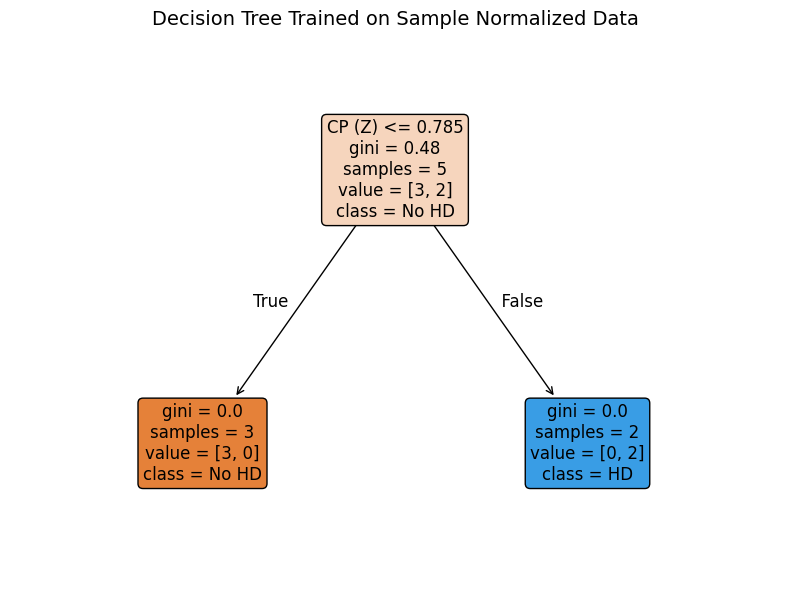

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
import numpy as np

# Sample normalized data
X = np.array([
    [-1.42],
    [-1.10],
    [0.63],
    [0.94],
    [0.94],
])
y = np.array([0, 0, 0, 1, 1])

# Train decision tree
clf = DecisionTreeClassifier(criterion='gini', max_depth=1, random_state=42)
clf.fit(X, y)


plt.figure(figsize=(8, 6))
plot_tree(
    clf,
    feature_names=["CP (Z)"],
    class_names=["No HD", "HD"],
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title("Decision Tree Trained on Sample Normalized Data", fontsize=14)
plt.tight_layout()
plt.show()


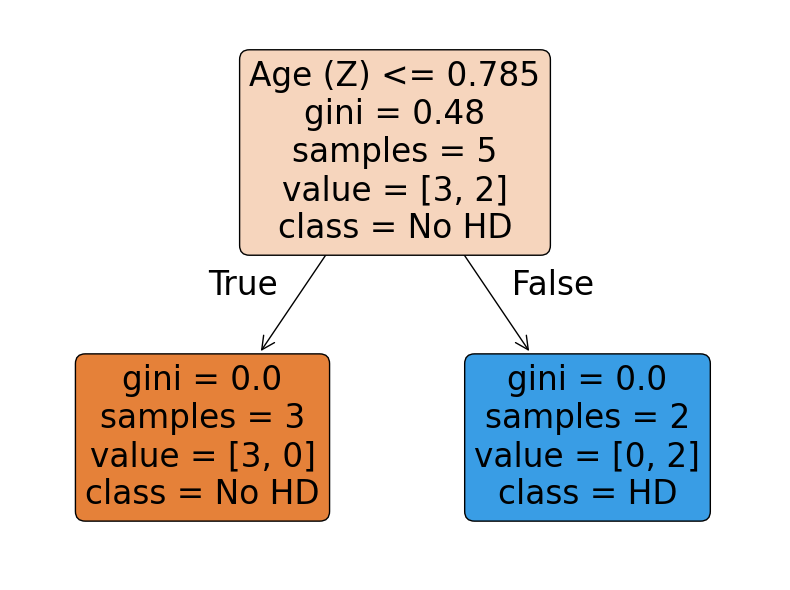

In [ ]:

data = {
    'Age (Z)': [-1.42, -1.10, 0.63, 0.94, 0.94],
    'Label': [0, 0, 0, 1, 1]
}

df = pd.DataFrame(data)

X = df[['Age (Z)']]
y = df['Label']

clf = DecisionTreeClassifier(criterion='gini', max_depth=1, random_state=42)
clf.fit(X, y)

plt.figure(figsize=(8, 6))
plot_tree(
    clf,
    feature_names=['Age (Z)'],
    class_names=['No HD', 'HD'],
    filled=True,
    rounded=True,
    impurity=True,
    label='all'
)
plt.tight_layout()
plt.show()
